# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2
# Negative feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

Authors: Jan Izquierdo, Carmen Samedi

---

The objectives of this practical are:
- to become familiar with numerical integration of dynamical systems using scipy's odeint function.
- to become familiar with the basic models of gene regulation for basal expression and transcriptional repression.
- to understand the differences between unregulated gene expression and negative autoregulation.
- to explore the effects of saturation in the controller of an integral feedback control system
    
    

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical integration

We will use scipy's odeint function to numerically integrate ODEs. Here is an example:

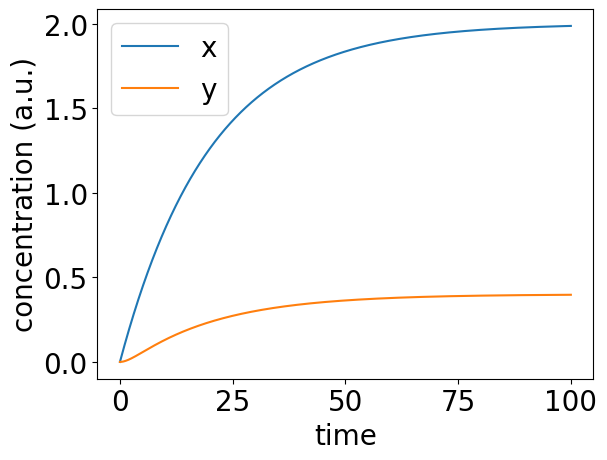

In [3]:
def test(xy,t):
    x,y=xy
    dx=alpha1-delta1*x
    dy=alpha2*x-delta2*y
    return [dx,dy]

alpha1 = 0.1
alpha2 = 0.1
delta1 = 0.05
delta2 = 0.5
tvec = np.arange(0,100,0.01)
x0 = [0,0]
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.plot(tvec,y[:,1],label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

# Constitutive expression

The following equation can be used to model the constitutive expression of a gene:
    
$$\frac{dP}{dt}=\alpha-\delta P$$

1. Consider $\alpha=10$ and $\delta = 1$.
    1. What is the analytic expression for the steady state of the system?
    2. Plot the time evolution of the system starting from $P_0=0$ using scipy's odeint function.
    3. Does the final value of the trajectory in b) coincide with the analytical steady state?
    4. At what time does P reach half the steady state value? Plot a vertical line at that point.


The analytical steady state is P=a/d, in this case P=10/1=10.0
The analitical steady state final value is 10.0, wich is the same concentration value at which the trajectory plateaus.
Half P is 5.0
The time where P=5.0 will be at 0.6931471805599453


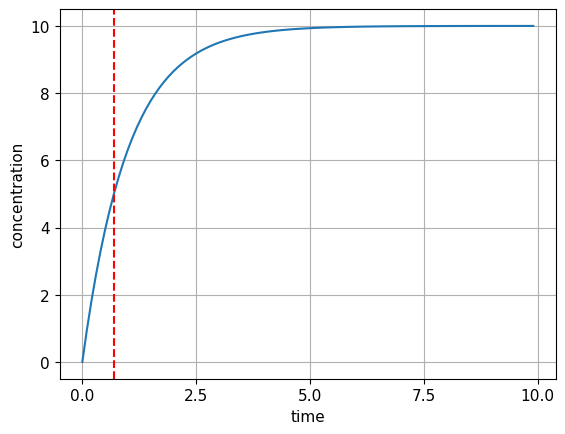

In [4]:

a=10 #alpha
d=1 #delta

#1.Analytic expression
#f(x)=a-bP
#0=a-bP
#P=a/b
print(f"The analytical steady state is P=a/d, in this case P={a}/{d}={a/d}")

#2.Plot the time evolution from P0
def s_evol(x,t):
    dx=a-d*x
    return dx

timeList=np.arange(0, 10, 0.1) #0.1 as step to make it smoother
x0=0
y=odeint(s_evol, x0, timeList)

plt.rcParams.update({'font.size': 11})
plt.plot(timeList,y[:,0])
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid(True)


#3.Final value of trajectory and analytical steady state
print(f"The analitical steady state final value is {a/d}, wich is the same concentration value at which the trajectory plateaus.")

#4.Time where P reaches (a/d)/2

P=a/d
p_half=P/2
print(f"Half P is {p_half}")

#P=P/2 in moment t
#Use formula P=(a/d)*(1-e^(-dt))
#P/(a/d)=1-e^(-dt)
#1-P/(a/d)=e^(-dt)
#ln(1-P/(a/d))=-dt
#ln(1-P/(a/d))/-d=t

t=np.log(1-p_half/(a/d))/-d
print(f"The time where P={p_half} will be at {t}")

plt.axvline(x=t, color="red", linestyle="dashed")

#Set the plot text size bask as it was
plt.rcParams.update({'font.size': 22})

2. What happens for the following parameter sets, in comparison with the previous one? Plot the four of them in the same plot and compare them. 
    1. alpha=10, delta=10
    2. alpha=100, delta=10
    3. alpha=100, delta=1
 

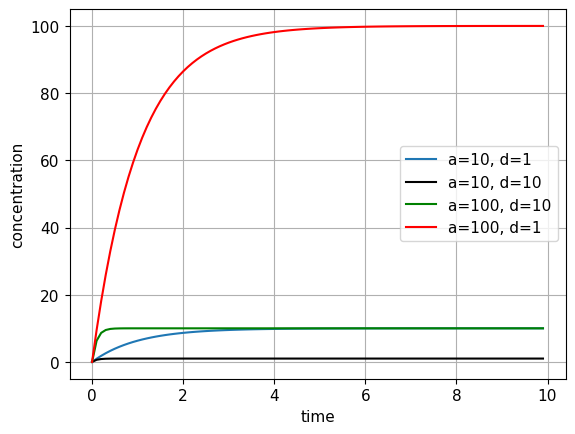

In [5]:
timeList=np.arange(0, 10, 0.1) #0.1 as step to make it smoother
x0=0

#For the original plot
a=10
d=1
y=odeint(s_evol, x0, timeList)

#For the proposed varibles in 1
a=10
d=10
y1=odeint(s_evol, x0, timeList)

#For the proposed variables in 2
a=100
d=10
y2=odeint(s_evol, x0, timeList)

#For the proposed variables in 3
a=100
d=1
y3=odeint(s_evol, x0, timeList)

plt.rcParams.update({'font.size': 11})
plt.plot(timeList,y[:,0], label='a=10, d=1')
plt.plot(timeList,y1[:,0], color="black", label='a=10, d=10')
plt.plot(timeList,y2[:,0], color="green", label='a=100, d=10')
plt.plot(timeList,y3[:,0], color="red", label='a=100, d=1')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.grid(True)



<span style="color:blue">It can be seen clearly that the ratio a/d determines the maximum concentration directly (P=a/d). It can also be seen that the smaller d is the more time it takes for the trajectory to reach the peak.</span>

# Negative feedback

Now consider the following negative autoregulation system:


$$\frac{dR}{dt}=\frac{\alpha}{1+\left(\frac{R}{K}\right)^n} - \delta R$$

1. Plot the production term for alpha=5, K=1, and n ranging from 1 to 6, for a range of R values from 0 to 5. What is the effect of increasing n?

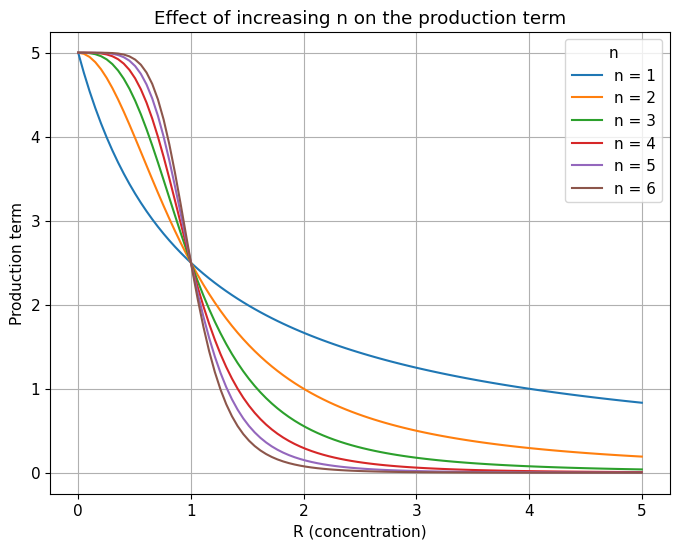

In [6]:
alpha = 5  # maximum production rate
K = 1      # dissociation constant
R_values = np.linspace(0, 5, 100)  

plt.figure(figsize=(8, 6))
n_values = range(1, 7)  # n from 1 to 6

for n in n_values:
    production_term = alpha / (1 + (R_values / K)**n)
    plt.plot(R_values, production_term, label=f'n = {n}')

plt.xlabel('R (concentration)')
plt.ylabel('Production term')
plt.title('Effect of increasing n on the production term')
plt.legend(title='n')
plt.grid(True)
plt.show()

<span style="color:blue"> We can see all the change happen at k which is not necssary but usually happens. This also confirms that the change we observe is mainly regarding the slope not the ss, this means we have a robust variable with n, which is essential for the cell to work correctly in a varied environment. 
When n=1, the concentration slowly drops, but as n grows we can observe almost immediately a more extreme change even with n=2. As n continues to grow we see the slope becoming really steep and reaching the 0 production really fast. 
We can observe exactly what we studied in class, this negative autofeedback is quite reactive, it acts like a switch and logically the more n we have the more we have to suppress so the change is sharp and fast.   </span>

2. Now fix n to 4, and plot the production term for K = 1, 2, and 4. What is the effect?

<Figure size 800x600 with 0 Axes>

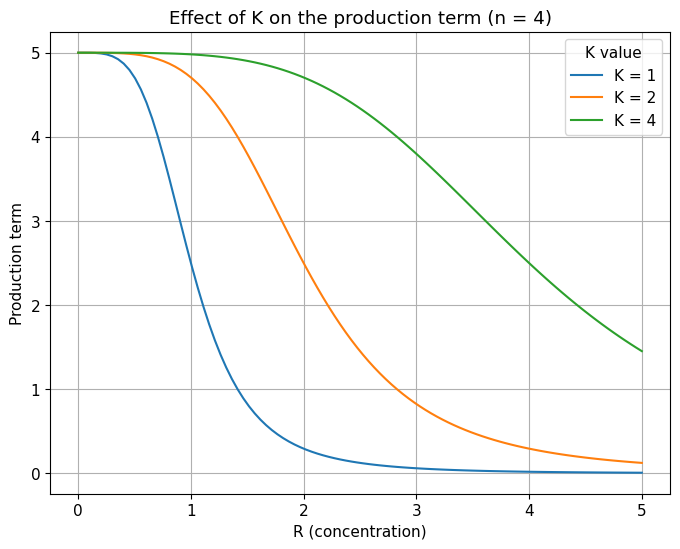

In [7]:
alpha = 5  # maximum production rate
n = 4      
R_values = np.linspace(0, 5, 100)  # Range of R values from 0 to 5

plt.figure(figsize=(8, 6))
K_values = [1, 2, 4]

# Plot the production term for each K
plt.figure(figsize=(8, 6))

for K in K_values:
    production_term = alpha / (1 + (R_values / K)**n)
    plt.plot(R_values, production_term, label=f'K = {K}')

# Labels and title
plt.xlabel('R (concentration)')
plt.ylabel('Production term')
plt.title('Effect of K on the production term (n = 4)')
plt.legend(title='K value')
plt.grid(True)
plt.show()

<span style="color:blue"> This time as we can see, the changes are not coinciding. The curve itself changes completely and the steady state finds itself affected. The curve shifts to the right and the slope becomes less and less steep. This is because we are changing the threshold itself! The higher the k the more we allow production before controlling it back to 0. K, unlike n, is quite sensitive to change. But all of this is necessary for a constitutive expression and a cell more constant in production.  </span>

3. If you wanted to build a repression system that is highly repressed at low values of repressor, how would you choose K and n? (in terms of low/high values) 

<span style="color:blue">To build this kind of repression system I would choose a high n but a low k, so that the change is sharp, fast and sensitive early on. </span>

# Study the response timescale of the system:

1. We will now compare how quickly the two models introduce above generate their product. To that end:
    1. Integrate the negative feedback model for $n=4$, $K=1$, $\alpha=10$ and $\delta=1$, starting from $R=0$ and compute the time to reach half the steady state concentration.
    2. Integrate the constitutive expression model with $\alpha=1.5$ and $\delta=1$ starting from $R=0$ and compute the time to reach half the steady state concentration. 
    3. Compare the results of B) and C).

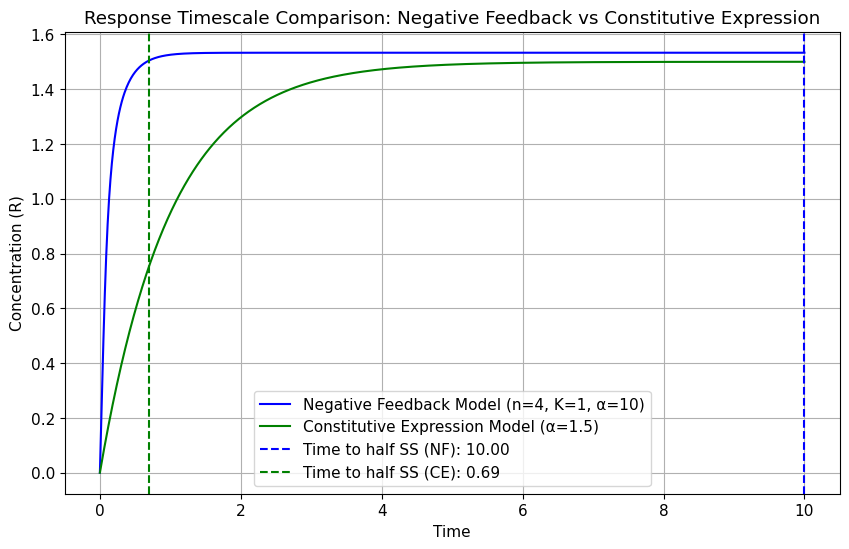

Time to reach half steady state (Negative Feedback Model): 10.00
Time to reach half steady state (Constitutive Expression Model): 0.69


In [8]:
alpha_nf = 10  # max production rate for negative feedback
K = 1          # dissociation constant
n = 4          # Hill coefficient
delta_nf = 1   # degradation rate

# Constitutive Model parameters
alpha_c = 1.5  # max production rate for constitutive expression
delta_c = 1    # degradation rate

# Time points
timeList = np.linspace(0, 10, 1000)

# 1. Negative Feedback Model
def neg_feedback(R, t):
    dRdt = alpha_nf / (1 + (R / K)**n) - delta_nf * R
    return dRdt

R0 = 0
# Integrate the system
R_neg_feedback = odeint(neg_feedback, R0, timeList)

# Compute steady-state concentration (analytically)
R_steady_nf = alpha_nf / delta_nf

# Find the time to reach half the steady state
R_half_nf = R_steady_nf / 2
time_half_nf = np.interp(R_half_nf, R_neg_feedback[:, 0], timeList)

# 2. Constitutive Expression Model
def constitutive_expression(R, t):
    dRdt = alpha_c - delta_c * R
    return dRdt

# Integrate the system
R_constitutive = odeint(constitutive_expression, R0, timeList)

# Compute steady-state concentration (analytically)
R_steady_c = alpha_c / delta_c


# half the steady state
R_half_c = R_steady_c / 2
time_half_c = np.interp(R_half_c, R_constitutive[:, 0], timeList)

# 3. Plots
plt.figure(figsize=(10, 6))
plt.plot(timeList, R_neg_feedback, label="Negative Feedback Model (n=4, K=1, α=10)", color='blue')
plt.plot(timeList, R_constitutive, label="Constitutive Expression Model (α=1.5)", color='green')

plt.axvline(x=time_half_nf, color='blue', linestyle='--', label=f'Time to half SS (NF): {time_half_nf:.2f}')
plt.axvline(x=time_half_c, color='green', linestyle='--', label=f'Time to half SS (CE): {time_half_c:.2f}')

plt.xlabel('Time')
plt.ylabel('Concentration (R)')
plt.title('Response Timescale Comparison: Negative Feedback vs Constitutive Expression')
plt.legend()
plt.grid(True)
plt.show()

print(f"Time to reach half steady state (Negative Feedback Model): {time_half_nf:.2f}")
print(f"Time to reach half steady state (Constitutive Expression Model): {time_half_c:.2f}")

<span style="color:blue"> As we can see the negative feedback is a bit sharper, because of the quick responsiveness, than the constitutive expression. The time to half SS is also longer for the constitutive expression. The nagtive feedback acts more like a switch as mentioned before, while the constitutive expression is gradual.  </span>

# Adaptation to perturbations

Integrate the negative feedback model for n=4, K=1, $\alpha=10$ and $\delta=1$, starting from R=0, for 10 time units. At that point, double the value of $\alpha$ and integrate for another 10 time units. Does the system return to the same steady state as before?

After running the negative feedback model for 20 time units, the first half(20) for alpha=10 and the second half for alpha=20, the steady state is [1.78680528]


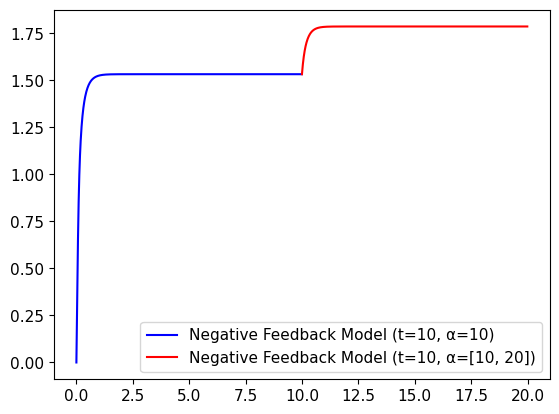

In [14]:
a_nf= 10  # max production rate for negative feedback
K = 1          # dissociation constant
n = 4          # Hill coefficient
d_nf= 1   # degradation rate

# Time points
timeList = np.arange(0, 10, 0.01)

# 1. Negative Feedback Model
def neg_feedback(R, t):
    dRdt = a_nf / (1 + (R / K)**n) - d_nf * R
    return dRdt

R0 = 0
# Integrate the system
R_nf_T10 = odeint(neg_feedback, R0, timeList)
#print(R_nf_T10)

past_a=a_nf
a_nf=a_nf*2
timeList_2 = np.arange(10, 20, 0.01)
R_nf_T20= odeint(neg_feedback, R_nf_T10[-1], timeList_2)

# Compute steady-state concentration (analytically)
R_steady_nf = a_nf / d_nf

print(f"After running the negative feedback model for {round(timeList_2[-1])} time units, the first half({round(timeList[-1])}) for alpha={past_a} and the second half for alpha={a_nf}, the steady state is {R_nf_T20[-1]}")

plt.plot(timeList, R_neg_feedback, label="Negative Feedback Model (t=10, α=10)", color='blue')
plt.plot(timeList_2, R_nf_T20,label="Negative Feedback Model (t=10, α=[10, 20])", color="red")
plt.legend()



<span style="color:blue">This plot shows us the dynamic of the negative feedback. We can see how reactive the system is, we changed the concentration in the middle and can immediately observe changes. We can once more confirm the switch-like nature of the negative feedback, it had settled and plateaued for tis first steady state (1.5) and then rose up and plateaued at a different steady state (~1.8) for the new concentration. This speedy response is essential in a gene regulatory network depending on external factors or signs, the network has to be able to respond and adapt fast to changes.</span>

Do the same for the constitutive expression model.

The steady state is: 20.0


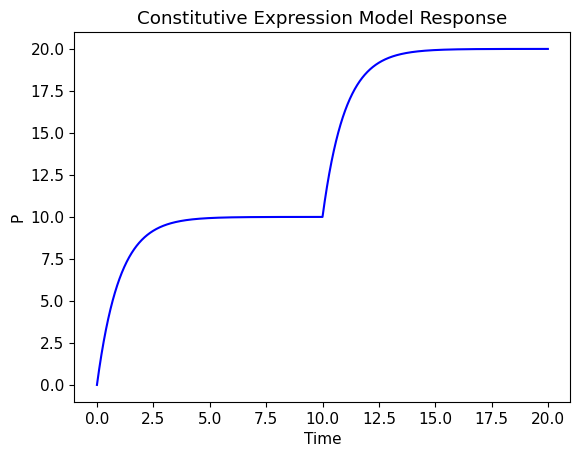

In [10]:
delta_c = 1  
alpha_1 = 10  
alpha_2 = 20

def constitutive_expression(R, t, alpha):
    dRdt = alpha - delta_c * R
    return dRdt

R0 = 0  

timeList_1 = np.arange(0, 10, 0.01)
timeList_2 = np.arange(10, 20, 0.01)

R_ce1 = odeint(constitutive_expression, R0, timeList_1, args=(alpha_1,))
R_ce2 = odeint(constitutive_expression, R_ce1[-1], timeList_2, args=(alpha_2,))

time_combined = np.concatenate((timeList_1, timeList_2))
R_combined = np.concatenate((R_ce1, R_ce2))
R_steady_c = alpha_2 / delta_c
print("The steady state is:", R_steady_c)

plt.plot(time_combined, R_combined, color='blue')
plt.ylabel('P')
plt.xlabel('Time')
plt.title('Constitutive Expression Model Response')
plt.show()

R_steady_state_1 = alpha_1 / delta_c
R_steady_state_2 = alpha_2 / delta_c



<span style="color:blue"> In this graph we can see how the change of concentration affects the steady state. The constitutive model shows a less rapid response than the negative. This time, we observe a more gradual cruve to arrive at the first steady state. Although the change in concentration is immediate, the model's response is not. We can see once more a gradual arrival at the new steady state. However slow the reaction is, the model is still able to react and adjut to the change. This model might be more affected by fluctuations. </span>

Interpret the results above in terms of the difference in robustness between the two models.

<span style="color:blue"> The negative feedback model shows more robustness than the constituive model whic can be seen in different changes we made along this practical. The constitutive model however is sitll sensitive to changes but less capables of adaptation. </span>